In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

pd.options.mode.chained_assignment = None

plt.style.use("ggplot")

matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Reading data

movie_df = pd.read_csv("data/Movies_Sales.csv")
movie_df

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
for column in movie_df.columns:
    missing_data = np.mean(movie_df[column].isnull())
    print("{} - {}%".format(column,round(missing_data * 100)))

Name - 0%
Rating - 1%
Genre - 0%
Year - 0%
Released - 0%
Score - 0%
Votes - 0%
Director - 0%
Writer - 0%
Star - 0%
Country - 0%
Budget - 28%
Gross - 2%
Company - 0%
Runtime - 0%


In [4]:
# Datatypes

movie_df.dtypes

Name         object
Rating       object
Genre        object
Year          int64
Released     object
Score       float64
Votes       float64
Director     object
Writer       object
Star         object
Country      object
Budget      float64
Gross       float64
Company      object
Runtime     float64
dtype: object

In [5]:
# Replacing NA with 0
movie_df = movie_df.fillna(0)

# Converting from Float to Int
movie_df["Gross"] = movie_df["Gross"].astype("int64")
movie_df["Budget"] = movie_df["Budget"].astype("int64")

movie_df.dtypes

Name         object
Rating       object
Genre        object
Year          int64
Released     object
Score       float64
Votes       float64
Director     object
Writer       object
Star         object
Country      object
Budget        int64
Gross         int64
Company      object
Runtime     float64
dtype: object

In [6]:
# Due to ambiguity in Released and Year, created new column "Correct Year"

if movie_df["Released"].empty & movie_df["Year"].empty:
    movie_df["Correct Year"] = "Unknown"
elif movie_df["Released"].empty:
    movie_df["Correct Year"] = movie["Year"].astype(str)
else:
    movie_df["Correct Year"] = movie_df["Released"].astype(str).str[-5:]

movie_df[["Released", "Year", "Correct Year"]]

,Released,Year,Correct Year
0,"June 13, 1980",1980,1980
1,"July 2, 1980",1980,1980
2,"June 20, 1980",1980,1980
3,"July 2, 1980",1980,1980
4,"July 25, 1980",1980,1980
...,...,...,...
7663,"October 23, 2020",2020,2020
7664,"February 7, 2020",2020,2020
7665,"April 27, 2020",2020,2020
7666,"October 1, 2020",2020,2020


<AxesSubplot:>

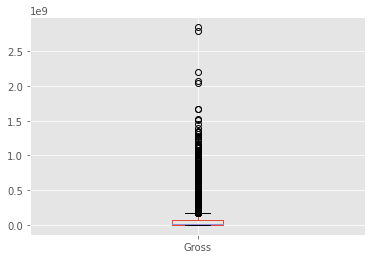

In [7]:
# Are there any outliners?

movie_df.boxplot(column = ["Gross"])

In [8]:
# Drop Duplicates

movie_df.drop_duplicates()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Correct Year
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [9]:
# Sort data as per Gross

movie_df.sort_values(by = ["Gross"], ascending = False, inplace = True)
movie_df

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Correct Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


<AxesSubplot:xlabel='Gross', ylabel='Budget'>

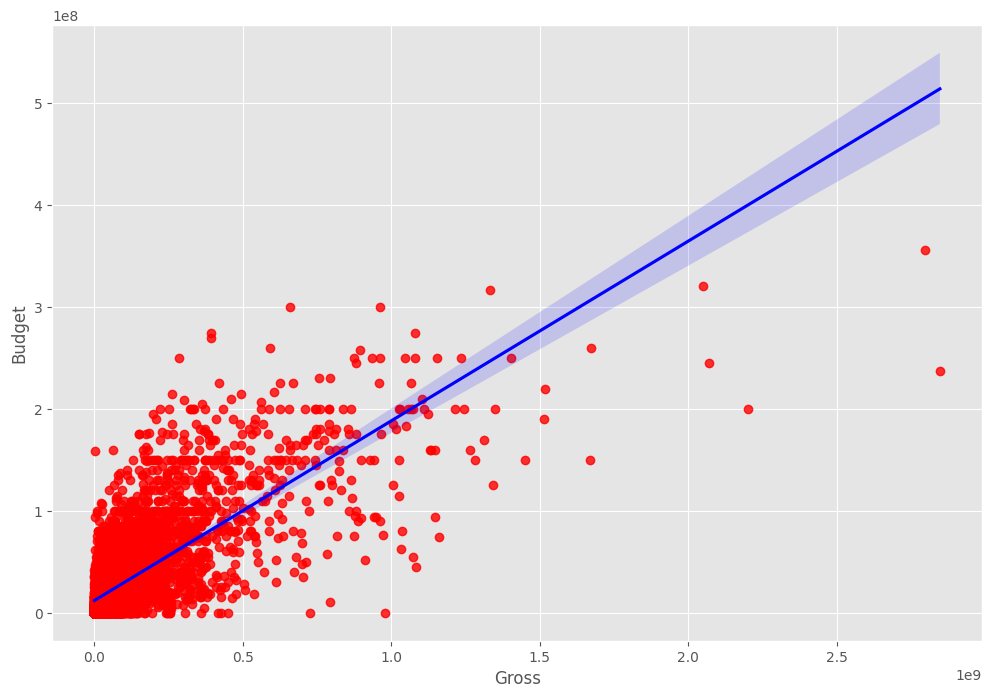

In [10]:
sns.regplot(data = movie_df, 
            x = "Gross", 
            y = "Budget", 
            scatter_kws = {"color" : "red"}, 
            line_kws = {"color" : "blue"})

Budget and Gross Earnings have positive correlation

<AxesSubplot:xlabel='Score', ylabel='Gross'>

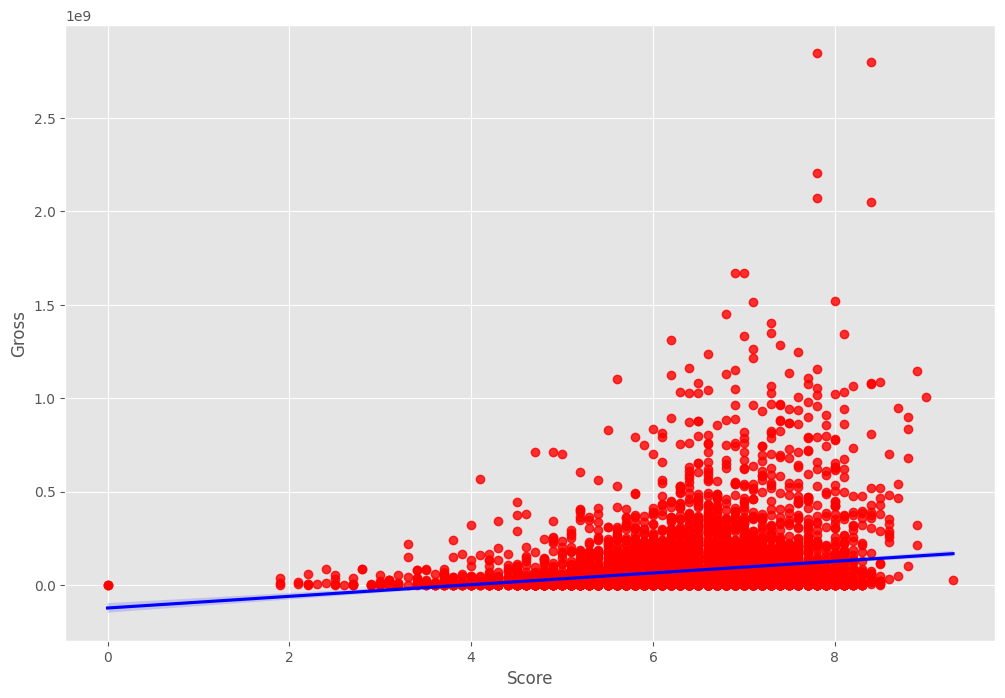

In [11]:
sns.regplot(data = movie_df, 
            x = "Score", 
            y = "Gross",
            scatter_kws = {"color" : "red"}, 
            line_kws = {"color" : "blue"})

In [12]:
# Correlation Matrix between all numeric columns

movie_df.corr(method = "pearson")

,Year,Score,Votes,Budget,Gross,Runtime
Year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
Score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
Votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
Budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
Gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
Runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [13]:
movie_df.corr(method = "kendall")

,Year,Score,Votes,Budget,Gross,Runtime
Year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
Score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
Votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
Budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
Gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
Runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [14]:
movie_df.corr(method = "spearman")

,Year,Score,Votes,Budget,Gross,Runtime
Year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
Score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
Votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
Budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
Gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
Runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


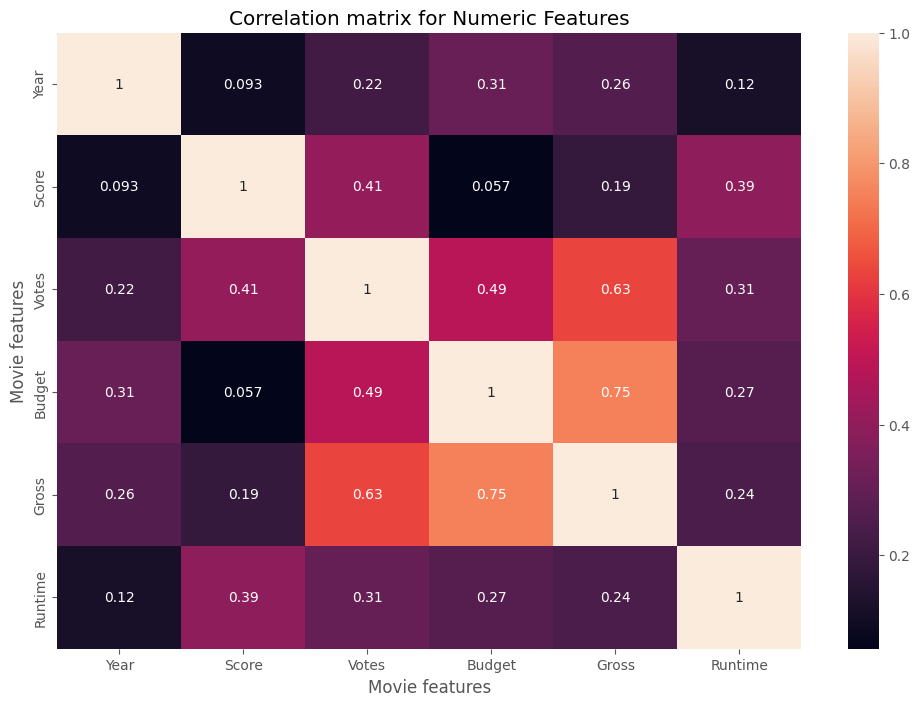

In [15]:
# Correlation matrix for Numeric Features

correlation_matrix = movie_df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [16]:
# Categorizing the non numeric columns

numerized_df = movie_df.copy()

for column in numerized_df.columns:
    if numerized_df[column].dtype == "object":
        numerized_df[column] = numerized_df[column].astype("category")
        numerized_df[column] = numerized_df[column].cat.codes
        
numerized_df

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Correct Year
5445,533,6,0,2009,685,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,29
7445,535,6,0,2019,181,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,39
3045,6896,6,6,1997,692,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,17
6663,5144,6,0,2015,687,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,35
7244,536,6,0,2018,190,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1252,4.5,274.0,117,83,2798,56,0,0,1160,92.0,10
1614,1745,7,10,1989,53,5.2,1300.0,1033,1744,167,55,0,0,147,85.0,9
1606,2691,7,8,1989,255,6.0,2900.0,2743,947,1196,7,0,0,2238,89.0,9
1601,3836,0,4,1989,1138,7.1,1500.0,1105,1697,682,19,0,0,505,104.0,56


In [17]:
movie_df.head(5)

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Correct Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [18]:
numerized_df.corr()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Correct Year
Name,1.000000,-0.008069,0.016355,0.011453,-0.011252,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.011095
Rating,-0.008069,1.000000,0.072423,0.008779,0.016492,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,-0.000743
Genre,0.016355,0.072423,1.000000,-0.081261,0.029791,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,0.042262
Year,0.011453,0.008779,-0.081261,1.000000,-0.000790,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.648420
Released,-0.011252,0.016492,0.029791,-0.000790,1.000000,0.039816,0.015924,-0.001447,-0.002433,0.015798,-0.020384,0.009210,0.000593,-0.010415,0.004851,0.036137
Score,0.016377,0.006192,0.027384,0.092616,0.039816,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.136271
Votes,0.013038,0.033743,-0.145296,0.222427,0.015924,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.033148
Director,0.009079,0.019483,-0.015258,-0.020795,-0.001447,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.015480
Writer,0.009081,-0.005921,0.006567,-0.008656,-0.002433,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,0.007872
Star,0.006472,0.013405,-0.005477,-0.027242,0.015798,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,0.002695


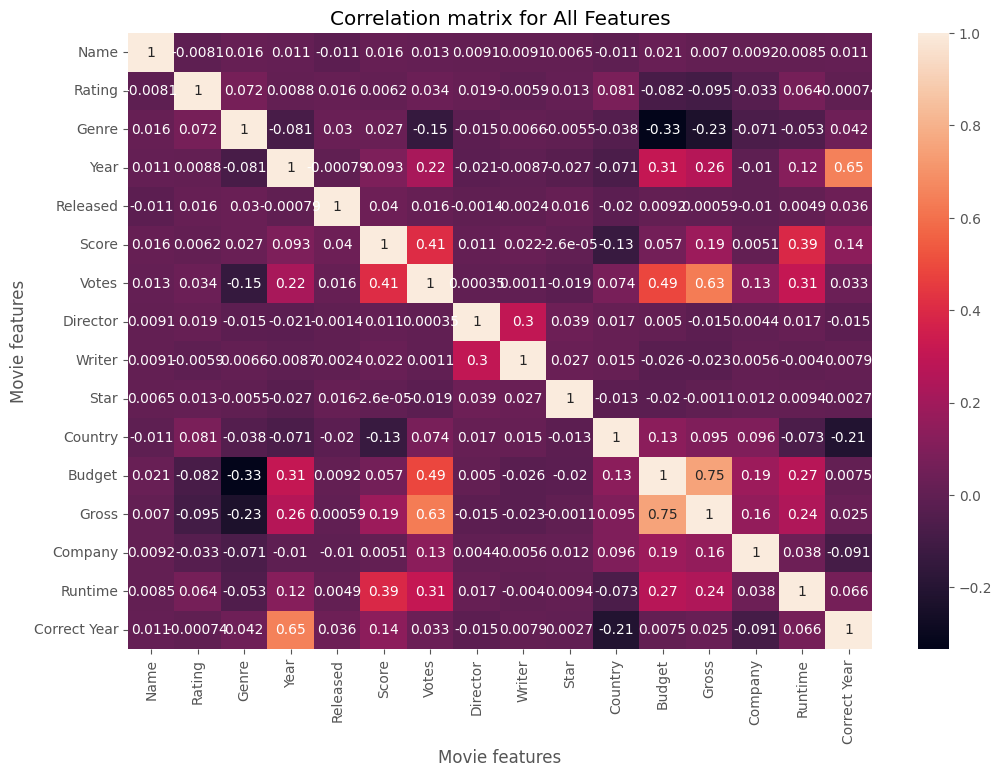

In [19]:
# Correlation matrix for All Features

correlation_matrix = numerized_df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

plt.title("Correlation matrix for All Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [20]:
corr_matrix = numerized_df.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

Name          Name            1.000000
              Rating         -0.008069
              Genre           0.016355
              Year            0.011453
              Released       -0.011252
                                ...   
Correct Year  Budget          0.007529
              Gross           0.024563
              Company        -0.091291
              Runtime         0.066300
              Correct Year    1.000000
Length: 256, dtype: float64

In [21]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Genre         Budget         -0.334021
Budget        Genre          -0.334021
Genre         Gross          -0.234297
Gross         Genre          -0.234297
Correct Year  Country        -0.211401
                                ...   
Year          Year            1.000000
Genre         Genre           1.000000
Rating        Rating          1.000000
Runtime       Runtime         1.000000
Correct Year  Correct Year    1.000000
Length: 256, dtype: float64

In [22]:
# Highest Correlation

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs

Gross         Votes           0.632870
Votes         Gross           0.632870
Year          Correct Year    0.648420
Correct Year  Year            0.648420
Budget        Gross           0.750157
Gross         Budget          0.750157
Name          Name            1.000000
Company       Company         1.000000
Gross         Gross           1.000000
Budget        Budget          1.000000
Country       Country         1.000000
Star          Star            1.000000
Writer        Writer          1.000000
Director      Director        1.000000
Votes         Votes           1.000000
Score         Score           1.000000
Released      Released        1.000000
Year          Year            1.000000
Genre         Genre           1.000000
Rating        Rating          1.000000
Runtime       Runtime         1.000000
Correct Year  Correct Year    1.000000
dtype: float64

Gross and Votes, Budget and Gross have high correlation

In [23]:
# Top 15 companies for Gross revenue

gross_revenue = movie_df.groupby("Company")[["Gross"]].sum().sort_values("Gross", ascending = False)[:15]
gross_revenue

,Gross
Company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


<AxesSubplot:>

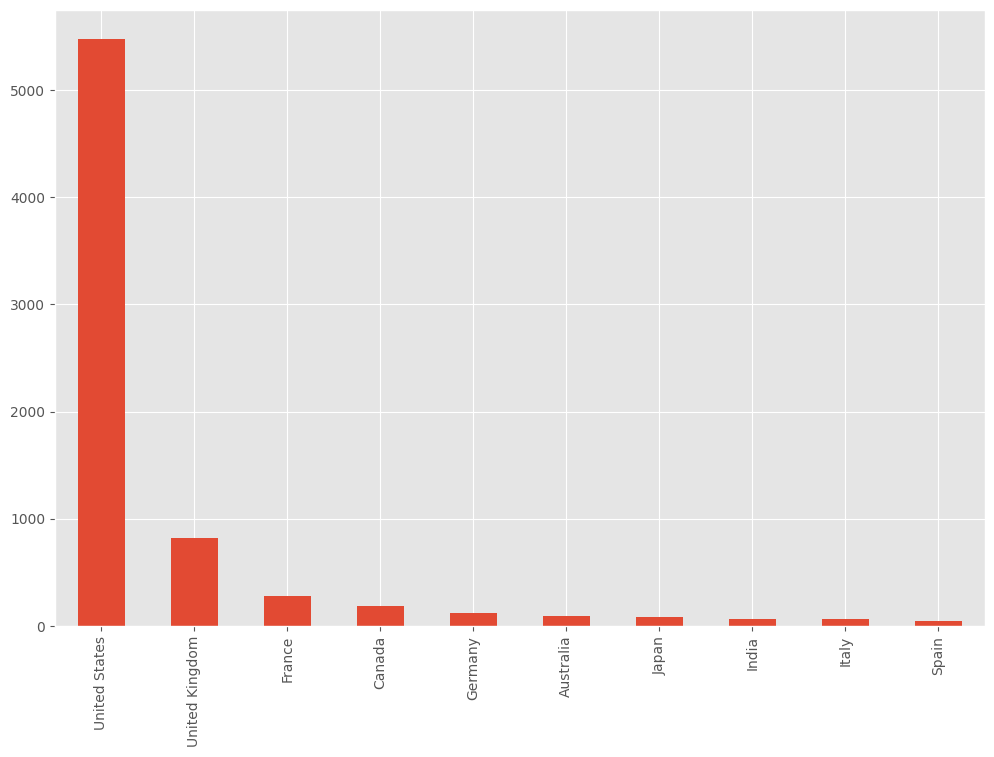

In [31]:
# Top 10 Countries

movie_df["Country"].value_counts()[:10].plot(kind = "bar")

<AxesSubplot:>

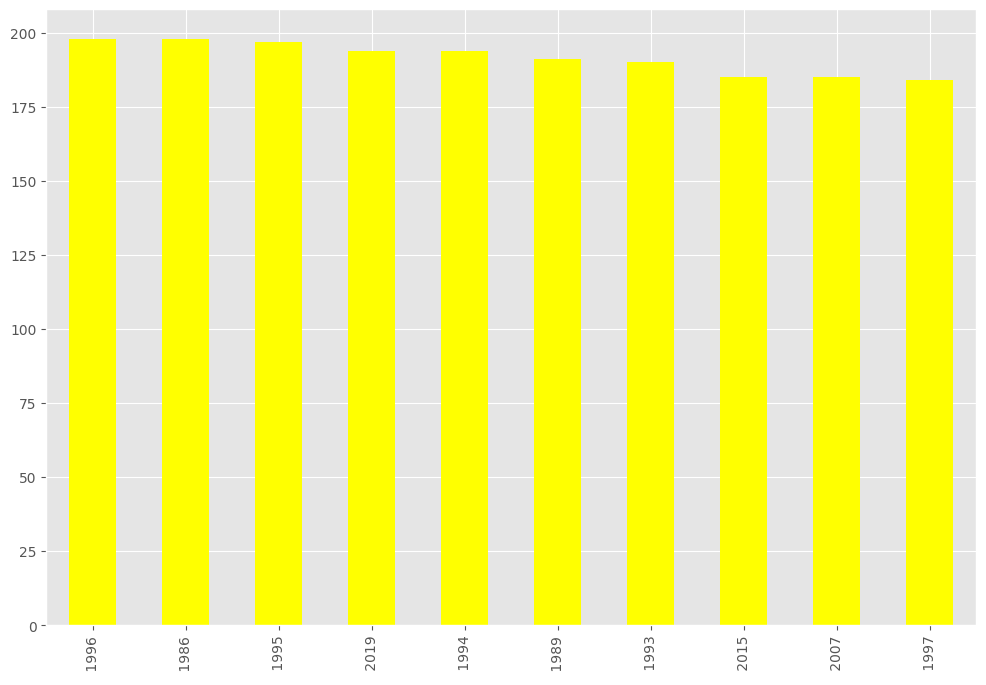

In [32]:
# Top 10 Year

movie_df["Correct Year"].value_counts()[:10].plot(kind = "bar", color = "Yellow")